In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
np.random.seed(36)

In [3]:
x = np.linspace(0, 1, 100)
y = np.cos(1.5 * np.pi * x)

x_objects = np.random.uniform(0, 1, size=30)
y_objects = np.cos(1.5 * np.pi * x_objects) + \
    np.random.normal(scale=.1, size=x_objects.shape)

Coefficients: 
 [-1.96635465]
Mean squared error: 0.19
Mean absolute error: 0.36
Coefficient of determination: 0.59
Intercept: 
 0.7757179200527622
Coefficients: 
 [  0.0697848  -14.40575795  18.10888186  -4.68598787]
Mean squared error: 0.00
Mean absolute error: 0.04
Coefficient of determination: 0.99
Intercept: 
 0.9600192254409398
Coefficients: 
 [-6.81089748e+02  6.70628391e+04 -2.74266735e+06  5.98179682e+07
 -8.07195678e+08  7.35070278e+09 -4.76177171e+10  2.26596089e+11
 -8.06361925e+11  2.15791258e+12 -4.30543259e+12  6.19617751e+12
 -5.81983833e+12  2.12487793e+12  2.99811651e+12 -5.95762149e+12
  5.24429491e+12 -2.71058612e+12  7.96284356e+11 -1.03402366e+11]
Mean squared error: 536104.60
Mean absolute error: 110.16
Coefficient of determination: -1170643.98
Intercept: 
 2.0657681313938965


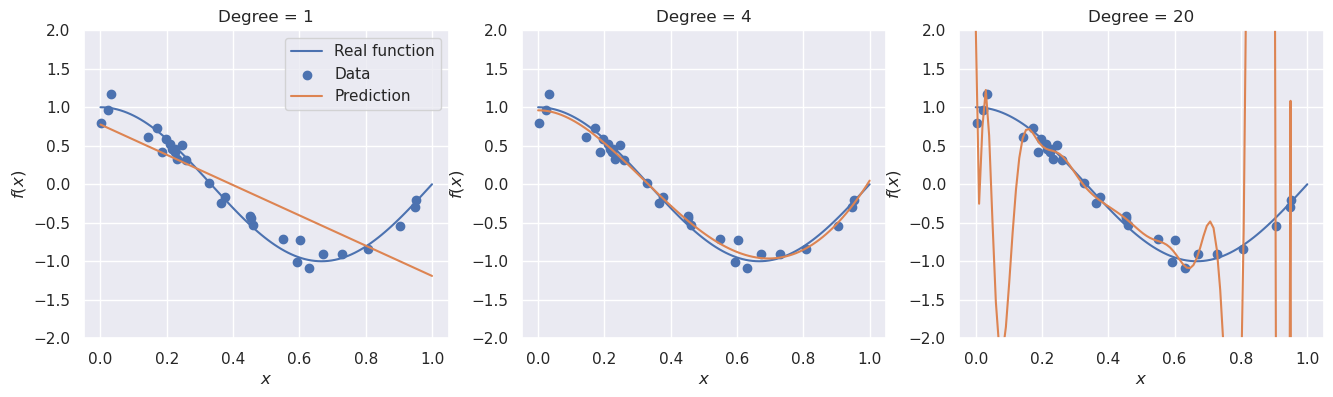

In [4]:
fig, axes = plt.subplots(figsize=(16, 4), ncols=3)
for _, degree in enumerate([1, 4, 20]):
    X_objects = PolynomialFeatures(
        degree=degree, include_bias=False
    ).fit_transform(x_objects[:, None])
    X = PolynomialFeatures(
        degree=degree, include_bias=False
    ).fit_transform(x[:, None])
    regr = LinearRegression().fit(X_objects, y_objects)
    y_pred = regr.predict(X)

    print("Coefficients: \n", regr.coef_)
    print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
    print("Mean absolute error: %.2f" % mean_absolute_error(y, y_pred))
    print("Coefficient of determination: %.2f" % r2_score(y, y_pred))
    print("Intercept: \n", regr.intercept_)

    axes[_].plot(x, y, label="Real function")
    axes[_].scatter(x_objects, y_objects, label="Data")
    axes[_].plot(x, y_pred, label="Prediction")
    if _ == 0:
        axes[_].legend()
    axes[_].set_title("Degree = %d" % degree)
    axes[_].set_xlabel("$x$")
    axes[_].set_ylabel("$f(x)$")
    axes[_].set_ylim(-2, 2)
#     axes[_].grid()

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

In [6]:
x_plot = np.linspace(0, 1, 10000)

X = np.random.uniform(0, 1, size=30)
y = np.cos(1.5 * np.pi * X) + np.random.normal(scale=.1, size=X.shape)

(-2.0, 2.0)

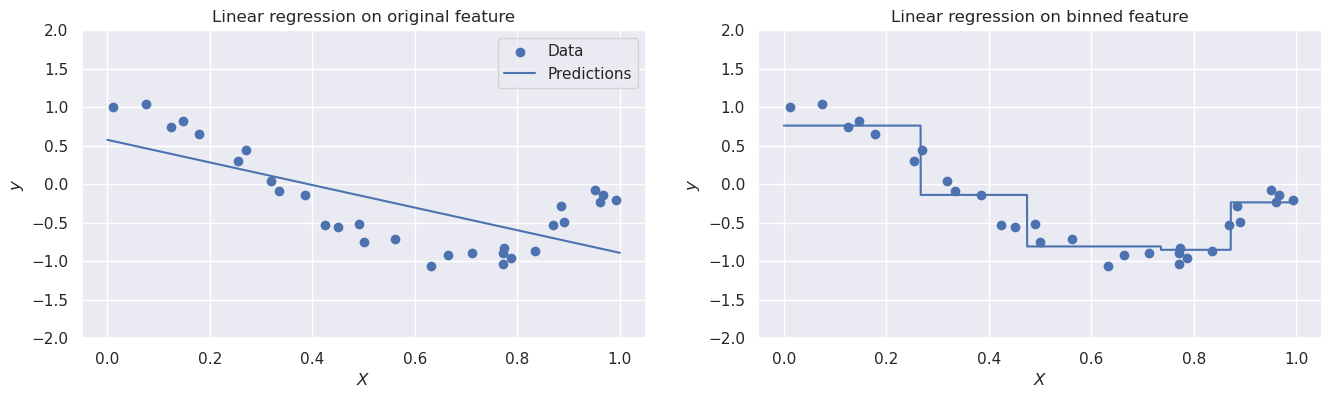

In [7]:
fig, axes = plt.subplots(figsize=(16, 4), ncols=2)
regr = LinearRegression()
regr.fit(X[:, np.newaxis], y)
y_pred_regr = regr.predict(x_plot[:, np.newaxis])
axes[0].scatter(X[:, np.newaxis], y, label="Data")
axes[0].plot(x_plot, y_pred_regr, label="Predictions")
axes[0].legend()
axes[0].set_title("Linear regression on original feature")
axes[0].set_xlabel("$X$")
axes[0].set_ylabel("$y$")
axes[0].set_ylim(-2, 2)
# axes[0].grid()

binner = KBinsDiscretizer(n_bins=5, strategy="quantile") # strategy="kmeans"
pipeline = Pipeline(
    steps=[("binning", binner), ("regression", LinearRegression())]
)
pipeline.fit(X[:, np.newaxis], y)
y_pred_binned = pipeline.predict(x_plot[:, np.newaxis])

axes[1].scatter(X[:, np.newaxis], y, label="Data")
axes[1].plot(x_plot, y_pred_binned, label="Predictions")
axes[1].set_title("Linear regression on binned feature")
axes[1].set_xlabel("$X$")
axes[1].set_ylabel("$y$")
axes[1].set_ylim(-2, 2)
# axes[1].grid()

In [8]:
X = np.random.exponential(1, size=30)
y = np.exp(X) + np.random.normal(scale=.1, size=X.shape)

x_plot = np.linspace(np.min(X), np.max(X), 10000)

Text(0, 0.5, '$y$')

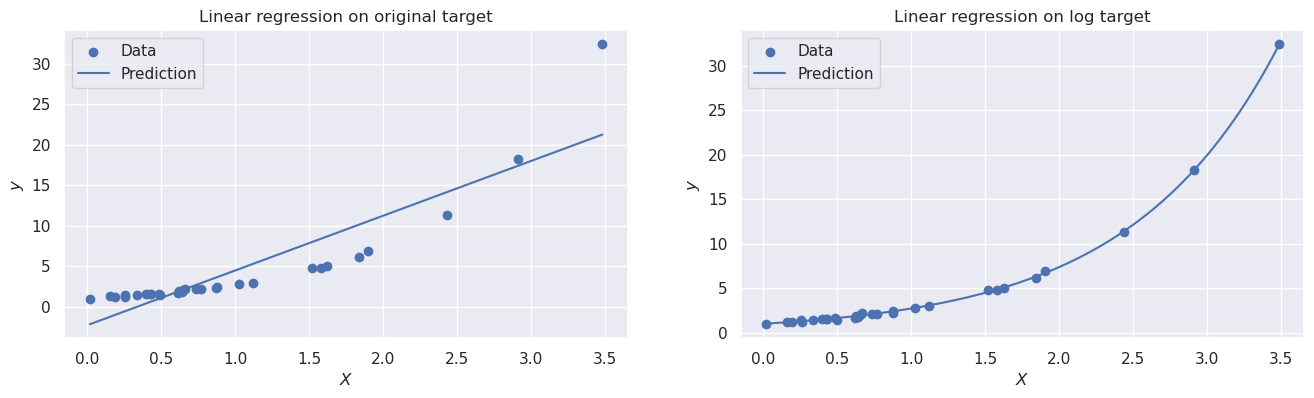

In [9]:
fig, axes = plt.subplots(figsize=(16, 4), ncols=2)
regr = LinearRegression()
regr.fit(X[:, np.newaxis], y)
y_pred_regr = regr.predict(x_plot[:, np.newaxis])
axes[0].scatter(X[:, np.newaxis], y, label="Data")
axes[0].plot(x_plot, y_pred_regr, label="Prediction")
axes[0].legend()
axes[0].set_title("Linear regression on original target")
axes[0].set_xlabel("$X$")
axes[0].set_ylabel("$y$")

y_log = np.log(y)
regr.fit(X[:, np.newaxis], y_log)
y_pred_log = np.exp(regr.predict(x_plot[:, np.newaxis]))
axes[1].scatter(X[:, np.newaxis], y, label="Data")
axes[1].plot(x_plot, y_pred_log, label="Prediction")
axes[1].set_title("Linear regression on log target")
axes[1].set_xlabel("$X$")
axes[1].set_ylabel("$y$")